## Importing data and modules
 - allocating data to bespoke structures


In [1]:
#imports
from random import randint, uniform, choice
import time


#read text file
with open("dataFile.txt") as f:
    lines = f.readlines()
f.close

#set up data 
D = []
F = []
S = int(lines[0])

#remove 1st 2 lines
lines = lines[2:]

#convert matrices into ints and store in corresponding "D array"
for i in range(50):
    #for D
    temp = lines[i].split()
    temp = [int(x) for x in temp]
    D.append(temp)
    #for F
    temp2 = lines[i+51].split()
    temp2 = [int(x) for x in temp2]
    F.append(temp2)


## Path finding 
functions needed to produce a path for an ant

In [2]:
#construct where nodes represent locations and edges represent weight between facilities
#weight is calculated as distance x flow

#calculates weight from one node to another
def weight(distance, flow):
    return distance*flow

#create facilities in  random locations
#function to create a random order of facilities
def randOrdFacs ():
    nodes = list(range(1,51))
    print(nodes)
    randOrder = []
    for i in range (size):
        randIndex = randint(0,len(nodes)-1)
        randOrder.append(nodes[randIndex])
        nodes.pop(randIndex)
    print(randOrder)
    return randOrder



#creating list from 0-49 for recording paths
def makeFacLocLists(size):
    facsIndexes = [x for x in range(size)]
    locsIndexes = [x for x in range(size)]
    return facsIndexes, locsIndexes


#create 50 x 50 matrix of pheromones connecting facs to locs
def pheroMatrix (size):
    M = [[-1 for i in range(size)] for x in range(size)]
    #loc on y
    for loc in range (size):
        #fac in x
        for fac in range (size):
            #use value between 0 and 1 with 0.01 stesp
            M[loc][fac] = randint(0,100)/100
    return M
            

#part of 2-step recursive sequence
def nextLoc (availableFacs, availableLocs, PheroM, pathLocs, pathFacs):
    #check if list is empty
    if len(availableLocs) > 0:
        #find pheromone strength
        pheroStrengthsL = getPheroStrengthLocs(availableLocs, pathFacs[-1],PheroM)
        #randomly select with bias
        choice2 = selectPhero(pheroStrengthsL)
        #add node to the path
        pathLocs.append(availableLocs[availableLocs.index(choice2)])
        #remove node from availableLocs
        availableLocs.remove(choice2)
        #call nextFac
        return nextFac(availableFacs, availableLocs, PheroM, pathLocs, pathFacs)
    else:
        #end code
        return pathLocs, pathFacs



#part of a two-step recursive sequence 
def nextFac (availableFacs, availableLocs, PheroM, pathLocs, pathFacs):
    #check if list is empty
    if len(availableFacs) > 0:
        #find pheromone strength
        pheroStrengthsF = getPheroStrengthFacs(availableFacs, pathLocs[-1],PheroM)
        #randomly select with bias
        choice = selectPhero(pheroStrengthsF)
        #add node to the path
        pathFacs.append(availableFacs[availableFacs.index(choice)])
        #remove node from availableLocs
        availableFacs.remove(choice)
        #call nextFac
        return nextLoc(availableFacs, availableLocs, PheroM, pathLocs, pathFacs)
    else:
        #end code
        return pathLocs, pathFacs


#randomly select a pheromone value from the list
def selectPhero (pheroDict):
    sum = 0
    #sum the values in the dictionary
    for i in pheroDict:
        sum += pheroDict[i]
    #multiply the sum of values by some random value between 0 and 1
    rand = sum * uniform(0,1)
    #find where this value lies in the dictionary
    for j in pheroDict:
        rand -= pheroDict[j]
        #if <0 we know its past that bound therefore is that element in the dictionary
        if rand <= 0:
            return j
        else:
            pass


#return a dictionary of possible choices for locations
def getPheroStrengthLocs (availableLocs, currentFac, PheroM):
    #create empty dictionary 
    Strengths = {}
    #iterate through remiaining locs
    for i in availableLocs:
        #append a key pair of the available Locations index, and the assciated pheromone strength
        Strengths[i] = PheroM[i][currentFac]
    return Strengths
    

#returns a dictionary of possible choices for facilities
def getPheroStrengthFacs (availableFacs, currentLoc, PheroM):
    #empty dictionary
    Strengths = {}
    #iterate through remaining facilities
    for i in availableFacs:
        #ppend a key pair of facility index, and pheromone strength
        Strengths[i] = PheroM[currentLoc][i]
    return Strengths


#create a path for an ant.
def makePath(M):
    #set up data structures
    pathLocations = []
    pathFacilities = []
    availableLocs, availableFacs = makeFacLocLists(S)

    #randomly select starting location
    startingNode = choice(availableLocs)
    pathLocations.append(startingNode)
    availableLocs.remove(startingNode)
    #alternately start can be performed evenly distributed

    #create paths
    pathLocations, pathFacilities = nextFac(availableFacs, availableLocs, M, pathLocations, pathFacilities)


    return pathLocations, pathFacilities

pheroM = pheroMatrix(S)
pL1, pF1 = makePath(pheroM)


## Evaluating paths
 - multiplicative method -> removes some level of bias
 - summative method -> flow and distance are equally represented since they have same range 

In [3]:
#calculates the fitness of a path by multiplying the values of each key-pair (location (distance) and facility (flow))
def calcFitnessMultiplicative(pathLocs, pathFacs):
    #set up data structs
    fitnessVals = []
    fitnessSum = 0
    #create a list of key pairs
    for i in range(len(pathLocs)-1):
        #i = 1st element (from)
        #i+1 = 2nd element (to)
        #look up distance in D  
        distance = D[pathLocs[i]-1][pathLocs[i+1]-1]
        #look up flow in F
        flow = F[pathFacs[i]-1][pathFacs[i+1]-1]
        #append pair to fitnessVals
        fitnessVals.append([distance, flow])
    #sum the key pairs
    for i in fitnessVals:
        fitnessSum += (i[0]*i[1])
    return fitnessSum
    

#calculates the fitness of a path by adding the values of each key-pair (location (distance) and facility (flow))
def calcFitnessSummative(pathLocs, pathFacs):
    #set up data structs
    fitnessVals = []
    fitnessSum = 0
    #create list of key pairs 
    for i in range(len(pathLocs)-1):
        #i = 1st element (from)
        #i+1 = 2nd element (to)
        #look up distance in D  
        distance = D[pathLocs[i]-1][pathLocs[i+1]-1]
        #look up flow in F
        flow = F[pathFacs[i]-1][pathFacs[i+1]-1]
        #append pair to fitnessVals
        fitnessVals.append([distance, flow])
    #sum the key pairs
    for i in fitnessVals:
        fitnessSum += (i[0]+i[1])
    return fitnessSum


    #multiply distance by flow for each section
    #create list of these values
    #sum is total fitness of path

calcFitnessMultiplicative(pL1, pF1)
calcFitnessSummative(pL1, pF1)

4633

## Pheromone table updating



In [4]:
#function to apply the evaporation rate to the pheromone matrix
def pheroEvaporate (M, e):
    for i in range(len(M)):
        for j in range(len(M[i])):
            #apply evaporarion rate to coords in pheroMatrix, to 3 d.p.
            M[i][j] = round(M[i][j]*e, 3)
    


def pheroUpdate(M, pathLocs, pathFacs, fitness):
    pass
    #calc value path should be updated by
    valToAdd = 1/fitness

    #update vals on path
    for i in range(len(pathLocs)-1):
        #apply dp limitation
        M[pathLocs[i]][pathFacs[i]] = round(M[pathLocs[i]][pathFacs[i]]+valToAdd, 3)



## finds best results

In [5]:
#find best fitness
def findBestFitness (paths):
    #find highest value
    maxVal = max(x[2] for x in paths)
    currentBest = []
    #min is best
    for i in paths:
        if i[2] < maxVal:
            maxVal = i[2]
            currentBest = i
    #return best set - [pathLocs, pathFacs, fitness]
    return currentBest

## Mother function - runs sim

In [6]:
def mother (m, e, pheroM):
    #data structures for ant paths - 3D list paths[ant path No][locpath (0), facpath (1)][index of subdenomination]
    paths = []
    #run m ants
    for i in range(m):
        #make path
        pL, pF = makePath(pheroM)
        #calculate fitness of path
        fitness = calcFitnessMultiplicative(pL, pF)
        #add data to list
        paths.append([pL, pF, fitness])

    #value to test change difference with fitness
    currentBest = findBestFitness(paths)

    #50000 optimal
    tuner = 50000

    for i in range(m):
        pheroUpdate(pheroM, paths[i][0], paths[i][1], paths[i][2]/tuner)
    #apply changes to pheroMatrix
    #evaporate pheroMatrix by e
    pheroEvaporate(pheroM, e)
    
    return currentBest 



## Final Main

In [7]:
def main (m,e):
    #set up
    count = 0
    bestPaths = []
    pheroM = pheroMatrix(S)
    #while no. of fitness evaluations < 10,000
    while count <= 9999:
        bestPaths.append(mother(m,e,pheroM))
        #increment count
        count += m
    veryBestPath = findBestFitness(bestPaths)
    print(veryBestPath)
    return veryBestPath

#for graph relating iterations to fitness improvement  --- otherwise ignore
def main2 (m,e):
    #set up
    count = 0
    bestPaths = []
    pheroM = pheroMatrix(S)
    #while no. of fitness evaluations < 10,000
    while count <= 9999:
        bestPaths.append(mother(m,e,pheroM))
        #increment count
        count += m
    veryBestPath = findBestFitness(bestPaths)
    print(veryBestPath)
    return bestPaths


## Test 1

m = 100  
e = 0.9

In [8]:
bestPaths1 = []
times1 = []
for i in range(5):
    startTime = time.time()
    bestPaths1.append(main(100,0.9))
    times1.append(time.time()-startTime)

[[47, 46, 28, 19, 2, 25, 23, 0, 3, 30, 48, 7, 20, 17, 29, 8, 14, 39, 43, 24, 13, 12, 18, 44, 34, 11, 22, 32, 49, 40, 4, 1, 9, 36, 35, 37, 45, 16, 10, 31, 15, 5, 27, 21, 6, 33, 42, 38, 41, 26], [49, 45, 42, 24, 47, 17, 20, 7, 11, 21, 32, 28, 22, 48, 43, 44, 25, 4, 30, 23, 35, 40, 5, 15, 37, 2, 26, 10, 1, 18, 29, 3, 8, 33, 31, 16, 39, 14, 0, 46, 19, 13, 38, 9, 12, 34, 36, 27, 41, 6], 59592]
[[1, 21, 0, 16, 26, 29, 23, 8, 11, 31, 2, 10, 15, 36, 4, 41, 46, 14, 48, 18, 37, 45, 12, 24, 20, 27, 40, 19, 35, 33, 47, 5, 49, 3, 6, 38, 13, 42, 9, 28, 17, 25, 32, 30, 43, 39, 22, 34, 44, 7], [26, 22, 6, 12, 25, 48, 33, 31, 32, 14, 8, 40, 46, 10, 13, 29, 3, 37, 20, 7, 1, 45, 36, 21, 39, 18, 19, 0, 47, 4, 16, 35, 11, 38, 49, 44, 34, 2, 5, 42, 23, 28, 17, 15, 24, 43, 27, 41, 30, 9], 63795]
[[42, 28, 3, 46, 12, 39, 19, 8, 20, 16, 29, 11, 18, 49, 44, 17, 43, 35, 0, 10, 9, 15, 33, 41, 13, 36, 2, 21, 47, 40, 22, 7, 5, 31, 32, 24, 45, 37, 38, 30, 1, 34, 26, 48, 14, 25, 4, 27, 6, 23], [35, 6, 37, 3, 33, 30, 

## Test 2
m = 100  
e = 0.5

In [9]:
bestPaths2 = []
times2 = []
for i in range(5):
    startTime = time.time()
    bestPaths2.append(main(100, 0.5))
    times2.append(time.time()-startTime)

[[46, 24, 44, 45, 3, 42, 18, 38, 1, 14, 26, 37, 34, 15, 13, 28, 39, 23, 43, 5, 12, 49, 10, 11, 9, 7, 40, 31, 36, 8, 4, 16, 2, 29, 22, 0, 33, 48, 41, 35, 17, 27, 19, 30, 47, 32, 6, 21, 25, 20], [11, 32, 18, 23, 2, 20, 41, 16, 6, 36, 27, 5, 37, 14, 12, 43, 19, 13, 34, 8, 29, 38, 3, 10, 7, 15, 45, 44, 30, 33, 46, 17, 25, 39, 35, 24, 28, 42, 1, 26, 40, 31, 48, 4, 0, 47, 49, 22, 9, 21], 65416]
[[18, 8, 15, 0, 22, 30, 29, 20, 1, 43, 34, 32, 14, 38, 39, 6, 49, 40, 9, 24, 12, 3, 37, 11, 13, 45, 35, 16, 46, 42, 31, 23, 10, 21, 27, 2, 28, 19, 41, 25, 4, 36, 47, 17, 5, 48, 7, 26, 44, 33], [20, 16, 23, 30, 17, 34, 38, 19, 1, 11, 36, 0, 44, 9, 40, 39, 6, 48, 12, 43, 14, 32, 8, 22, 33, 7, 47, 25, 26, 46, 29, 35, 5, 41, 27, 24, 2, 4, 21, 42, 10, 49, 18, 37, 13, 31, 15, 45, 3, 28], 63960]
[[21, 16, 48, 25, 14, 28, 44, 32, 26, 19, 13, 7, 36, 20, 45, 22, 17, 29, 37, 34, 31, 46, 9, 4, 18, 10, 1, 12, 24, 43, 33, 42, 38, 8, 40, 39, 30, 41, 5, 11, 6, 15, 2, 27, 35, 3, 0, 47, 23, 49], [9, 28, 6, 48, 21, 33, 

## Test 3
m = 10  
e = 0.9

In [10]:
bestPaths3 = []
times3 = []
for i in range(5):
    startTime = time.time()
    bestPaths3.append(main(10,0.9))
    times3.append(time.time()-startTime)


[[31, 38, 39, 42, 49, 1, 20, 8, 25, 21, 33, 32, 36, 47, 0, 30, 10, 12, 46, 16, 43, 29, 24, 44, 2, 26, 9, 14, 45, 15, 27, 40, 11, 13, 4, 7, 41, 3, 19, 34, 37, 22, 5, 17, 35, 48, 18, 6, 28, 23], [3, 38, 39, 18, 0, 25, 5, 41, 1, 36, 8, 15, 28, 45, 31, 42, 14, 12, 19, 35, 33, 21, 37, 4, 29, 46, 2, 26, 32, 44, 13, 7, 40, 17, 20, 11, 48, 43, 30, 16, 27, 34, 6, 22, 49, 24, 23, 10, 9, 47], 65000]
[[4, 39, 44, 28, 37, 13, 36, 20, 31, 40, 11, 0, 16, 3, 34, 49, 10, 45, 8, 6, 25, 35, 48, 33, 38, 46, 27, 47, 30, 26, 22, 15, 24, 7, 32, 42, 43, 21, 17, 2, 1, 23, 5, 12, 18, 29, 9, 19, 14, 41], [0, 9, 17, 42, 26, 38, 34, 1, 25, 39, 16, 32, 24, 21, 4, 20, 5, 13, 6, 18, 48, 27, 19, 8, 10, 12, 33, 14, 35, 23, 47, 41, 31, 44, 3, 30, 43, 36, 49, 28, 7, 15, 11, 2, 37, 40, 29, 22, 46, 45], 65879]
[[36, 15, 5, 34, 13, 6, 38, 37, 3, 45, 8, 33, 14, 0, 1, 25, 18, 39, 32, 12, 49, 46, 43, 40, 11, 28, 29, 30, 17, 35, 31, 21, 20, 7, 16, 26, 4, 42, 22, 10, 44, 27, 23, 48, 47, 9, 41, 2, 24, 19], [12, 8, 2, 35, 41, 3, 5

## Test 4
m = 10  
e = 0.5

In [11]:
bestPaths4 = []
times4 = []
for i in range(5):
    startTime = time.time()
    bestPaths4.append(main(10,0.5))
    times4.append(time.time()-startTime)

[[13, 45, 24, 26, 41, 32, 30, 29, 17, 5, 43, 7, 34, 3, 16, 4, 11, 15, 42, 37, 9, 47, 18, 23, 6, 12, 21, 40, 19, 36, 22, 38, 28, 33, 35, 44, 39, 27, 31, 1, 49, 10, 0, 20, 14, 48, 46, 25, 2, 8], [31, 2, 47, 46, 16, 5, 24, 14, 49, 29, 19, 32, 12, 6, 7, 1, 17, 10, 37, 18, 30, 40, 3, 42, 20, 8, 41, 34, 48, 21, 27, 22, 28, 4, 11, 43, 38, 44, 39, 23, 25, 0, 36, 26, 45, 33, 15, 9, 13, 35], 69443]
[[43, 0, 9, 3, 18, 31, 41, 20, 22, 8, 14, 17, 1, 32, 48, 7, 19, 11, 2, 6, 24, 33, 26, 5, 13, 45, 37, 35, 42, 25, 34, 39, 15, 44, 38, 49, 47, 40, 16, 10, 12, 46, 28, 23, 29, 21, 27, 30, 36, 4], [12, 26, 11, 21, 19, 45, 35, 48, 14, 4, 33, 6, 43, 40, 16, 44, 47, 1, 8, 23, 24, 9, 49, 38, 5, 0, 13, 20, 10, 39, 28, 36, 27, 3, 37, 31, 29, 32, 41, 15, 42, 34, 30, 22, 7, 25, 17, 2, 46, 18], 64887]
[[23, 39, 31, 28, 32, 41, 7, 45, 8, 40, 30, 44, 10, 16, 17, 18, 25, 47, 43, 15, 13, 3, 42, 2, 29, 26, 48, 5, 4, 0, 14, 22, 9, 6, 49, 34, 35, 20, 27, 21, 37, 19, 36, 12, 1, 46, 11, 33, 38, 24], [44, 10, 0, 4, 20, 41, 

## Producing graphs

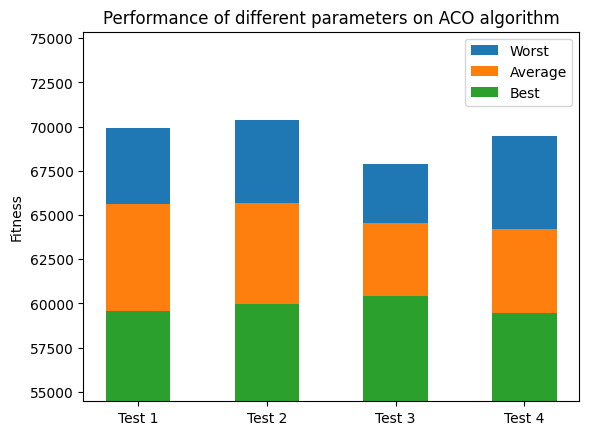

The best score was: 59464
The worst score was: 70367


In [12]:
import matplotlib.pyplot as plt

#make list of averages 
average1 = sum([x[2] for x in bestPaths1])/5
average2 = sum([x[2] for x in bestPaths2])/5
average3 = sum([x[2] for x in bestPaths3])/5
average4 = sum([x[2] for x in bestPaths4])/5

averageList = [average1, average2, average3, average4]


#make list of best of each
best1 = min([x[2] for x in bestPaths1])
best2 = min([x[2] for x in bestPaths2])
best3 = min([x[2] for x in bestPaths3])
best4 = min([x[2] for x in bestPaths4])

bestList = [best1, best2, best3, best4]

#make list of worst of each
worst1 = max([x[2] for x in bestPaths1])
worst2 = max([x[2] for x in bestPaths2])
worst3 = max([x[2] for x in bestPaths3])
worst4 = max([x[2] for x in bestPaths4])

worstList = [worst1, worst2, worst3, worst4]

#width of bars
width = 0.5

#labels:
labels = ["Test 1", "Test 2", "Test 3", "Test 4"]

fig, ax = plt.subplots()

ax.bar(labels, worstList, width, label = "Worst")
ax.bar(labels, averageList, width, label = "Average")
ax.bar(labels, bestList, width, label = "Best")

ax.set_ylim([min(bestList)-5000, max(worstList)+5000])

ax.set_ylabel("Fitness")
ax.set_title("Performance of different parameters on ACO algorithm")
ax.legend()

plt.show()

print(f"The best score was: {min(bestList)}")
print(f"The worst score was: {max(worstList)}")


## Time graph


[6.533155632019043, 6.33684196472168, 7.75181393623352, 7.498700904846191]


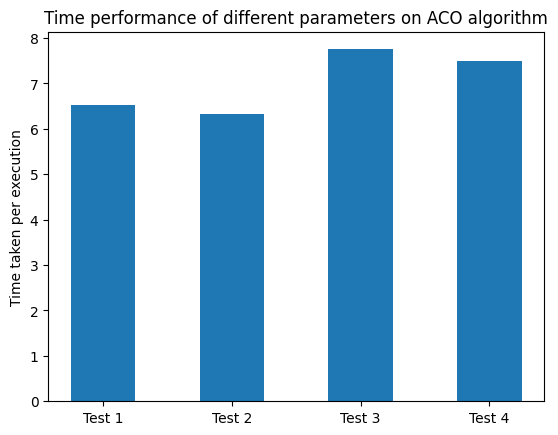

In [13]:
#get average time taken for each test
averageTimes1 = sum(times1)/5
averageTimes2 = sum(times2)/5
averageTimes3 = sum(times3)/5
averageTimes4 = sum(times4)/5

#list of average times
averageTimes = [averageTimes1, averageTimes2, averageTimes3, averageTimes4]
print(averageTimes)

#width of bars
width = 0.5

#labels:
labels = ["Test 1", "Test 2", "Test 3", "Test 4"]

fig, ax = plt.subplots()

ax.bar(labels, averageTimes, width)
ax.set_ylabel("Time taken per execution")
ax.set_title("Time performance of different parameters on ACO algorithm")

plt.show()
    
#bar chart

## Graph of fitness improvement over iterations

[[11, 22, 26, 27, 18, 29, 33, 30, 12, 10, 42, 20, 1, 46, 4, 47, 7, 48, 13, 43, 9, 16, 35, 36, 34, 5, 45, 41, 24, 32, 15, 38, 37, 44, 39, 6, 0, 40, 8, 2, 21, 14, 25, 31, 17, 19, 3, 28, 49, 23], [3, 26, 29, 21, 23, 24, 9, 44, 49, 0, 39, 27, 10, 22, 13, 46, 45, 12, 33, 4, 18, 11, 25, 32, 16, 19, 31, 30, 40, 14, 47, 15, 48, 34, 6, 7, 2, 43, 35, 37, 1, 42, 36, 5, 28, 8, 20, 38, 17, 41], 66988]
[[20, 13, 4, 48, 45, 39, 18, 24, 27, 30, 49, 6, 28, 37, 32, 46, 47, 2, 16, 41, 0, 10, 38, 17, 33, 3, 21, 5, 43, 44, 35, 26, 42, 19, 40, 34, 9, 15, 11, 7, 8, 12, 25, 14, 31, 1, 29, 36, 22, 23], [27, 39, 43, 6, 30, 45, 20, 48, 33, 0, 21, 32, 24, 11, 4, 42, 5, 25, 19, 31, 3, 2, 18, 40, 35, 7, 14, 10, 23, 36, 47, 17, 1, 37, 26, 49, 15, 29, 28, 22, 38, 13, 12, 9, 41, 34, 16, 44, 8, 46], 65726]
[[30, 10, 22, 14, 47, 37, 31, 17, 3, 4, 48, 23, 11, 6, 2, 18, 38, 5, 43, 25, 15, 29, 35, 19, 32, 39, 27, 34, 16, 41, 24, 8, 45, 28, 46, 44, 7, 20, 1, 40, 9, 36, 21, 42, 26, 33, 0, 13, 12, 49], [31, 46, 14, 45, 22, 8,

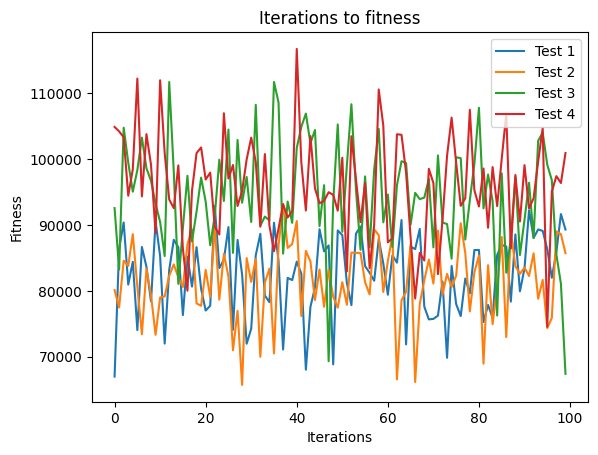

In [14]:
#list of fitnesses to iteration for each
iterations = [x for x in range(100)]

#create list of rates
iRate1 = []
iRate2 = []
iRate3 = []
iRate4 = []

#for i in range(5):
iRate1 = main2(100, 0.9)
iRate2 = main2(100, 0.5)
iRate3 = main2(10,0.9)
iRate4 = main2(10,0.5)


averageR1 = [x[2] for x in iRate1]
averageR2 = [x[2] for x in iRate2]
averageR3 = [x[2] for x in iRate3]
averageR3 = averageR3[0::10]
averageR4 = [x[2] for x in iRate4]
averageR4 = averageR4[0::10]


fig, ax = plt.subplots()

ax.plot(iterations, averageR1, label = "Test 1")
ax.plot(iterations, averageR2, label = "Test 2")
ax.plot(iterations, averageR3, label = "Test 3")
ax.plot(iterations, averageR4, label = "Test 4")


ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
ax.set_title("Iterations to fitness")

ax.legend()
plt.show()

